# Analisis de resultados

## Caracteristicas del experimento 1

A continuación se resumen las caracteristicas manejadas en el experimento:
1. Tasas de transferencia manejadas: Normal, 2kpps, 4kpps, 6kpps, 8kpps, 10kpps. 
2. Dos replicas para cada caso.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

Cargando los dataframe a partir de cvs

In [35]:
iperfDF = {}
pingDF = {}
summaryDF = {}
baseDir = './experimento1_cvs_resumen_10_2/'
files = os.listdir(baseDir)
print(files)

['ping_2kpps.csv', 'ping_4kpps.csv', 'iperf_2kpps.csv', 'resumen.csv', 'ping_6kpps.csv', 'iperf_10kpps.csv', 'iperf_8kpps.csv', 'ping_10kpps.csv', 'iperf_4kpps.csv', 'iperf_normal.csv', 'iperf_6kpps.csv', 'ping_normal.csv', 'ping_8kpps.csv']


In [36]:
for e in files:
    if 'csv' in e:
        k = e.split(baseDir)[0]
        if 'ping' in e:
            pingDF[k.split('_')[1]] = pd.read_csv(baseDir + e,sep=';', index_col=0)
            pingDF[k.split('_')[1]].columns.name = 'metricas'
            pingDF[k.split('_')[1]].index.name = 'replica'
        elif 'iperf' in e:
            iperfDF[k.split('_')[1]] = pd.read_csv(baseDir + e,sep=';', index_col=0)
            iperfDF[k.split('_')[1]].columns.name = 'metricas'
            iperfDF[k.split('_')[1]].index.name = 'replica'
        else:
            summaryDF['summary'] = pd.read_csv(baseDir + e,sep=';', index_col=0)
            summaryDF['summary'].columns.name = 'metricas'
            summaryDF['summary'].index.name = 'replica'
            

# Verificando claves
print(iperfDF.keys())
print(pingDF.keys())
print(summaryDF.keys())

dict_keys(['8kpps.csv', '4kpps.csv', '2kpps.csv', '10kpps.csv', '6kpps.csv', 'normal.csv'])
dict_keys(['6kpps.csv', '4kpps.csv', '2kpps.csv', '10kpps.csv', '8kpps.csv', 'normal.csv'])
dict_keys(['summary'])


### Informacion iperf ###

In [37]:
for k in iperfDF:
    print('Medias iperf: ' + k)
    print(iperfDF[k])
    print()


Medias iperf: 8kpps.csv
metricas  interval  transfer    BW
replica                           
0         0.0-10.0     118.0  98.6
1         0.0-10.3     121.0  98.6

Medias iperf: 4kpps.csv
metricas  interval  transfer     BW
replica                            
0         0.0-10.2     120.0   98.4
1         0.0-10.3     122.0  100.0

Medias iperf: 2kpps.csv
metricas  interval  transfer    BW
replica                           
0         0.0-10.2     119.0  98.2
1         0.0-10.1     118.0  98.2

Medias iperf: 10kpps.csv
metricas  interval  transfer    BW
replica                           
0         0.0-10.2     117.0  96.8
1         0.0-10.2     118.0  97.0

Medias iperf: 6kpps.csv
metricas  interval  transfer     BW
replica                            
0         0.0-10.1     121.0  100.0
1         0.0-10.2     121.0  100.0

Medias iperf: normal.csv
metricas  interval  transfer    BW
replica                           
0         0.0-10.0     115.0  96.2
1         0.0-10.0     115.0  96.4



### Informacion ping ###

In [38]:
for k in pingDF:
    print('Medias ping: ' + k)
    print(pingDF[k])
    print()

Medias ping: 6kpps.csv
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9182.0    0.025    0.562     5.10     1.513
1         10.0  10.0     0.0  9197.0    0.033    0.537     4.91     1.457

Medias ping: 4kpps.csv
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9198.0    0.029    0.685    6.378     1.898
1         10.0  10.0     0.0  9200.0    0.031    1.059   10.105     3.015

Medias ping: 2kpps.csv
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9180.0    0.030    0.818    7.727     2.303
1         10.0  10.0     0.0  9190.0    0.038    1.139   10.800     3.220

Medias ping: 10kpps.csv
metricas  p_tx  

### Información resumen ###

In [39]:
"""
axes = datosGraficas.plot.bar(rot=0, subplots=True)
    axes[1].legend(loc=2)  # doctest: +SKIP
    plt.show()
    
"""  
print("Resumen de las metricas")
summaryDF['summary']
print(summaryDF['summary'])

Resumen de las metricas
metricas     BW     RTT
replica                
10kpps     96.9  0.5860
6kpps     100.0  0.5495
normal     96.3  0.6240
8kpps      98.6  0.9860
2kpps      98.2  0.9785
4kpps      99.2  0.8720


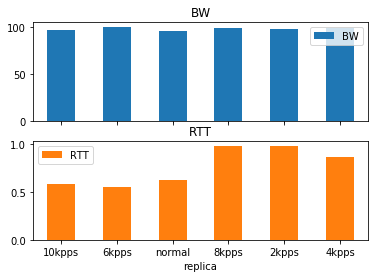

In [40]:
axes = summaryDF['summary'].plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  # doctest: +SKIP

## Caracteristicas del experimento 2

A continuación se resumen las caracteristicas manejadas en el experimento:
1. Tasas de transferencia manejadas: Normal, 2kpps, 4kpps, 6kpps, 8kpps, 10kpps. 
2. Una replica por caso.
3. Tiempo total de medición por prueba: 50seg

In [43]:
iperfDF = {}
pingDF = {}
summaryDF = {}
baseDir = "./experimento2_cvs_resumen_50_1/"
files = os.listdir(baseDir)

for e in files:
    if 'csv' in e:
        k = e.split('.')[0]
        if 'ping' in e:
            pingDF[k.split('_')[1]] = pd.read_csv(baseDir + e,sep=';', index_col=0)
            pingDF[k.split('_')[1]].columns.name = 'metricas'
            pingDF[k.split('_')[1]].index.name = 'replica'
        elif 'iperf' in e:
            iperfDF[k.split('_')[1]] = pd.read_csv(baseDir + e,sep=';', index_col=0)
            iperfDF[k.split('_')[1]].columns.name = 'metricas'
            iperfDF[k.split('_')[1]].index.name = 'replica'
        else:
            summaryDF['summary'] = pd.read_csv(baseDir + e ,sep=';', index_col=0)
            summaryDF['summary'].columns.name = 'metricas'
            summaryDF['summary'].index.name = 'replica'


### Informacion iperf ###

In [44]:
for k in iperfDF:
    print('Medias iperf: ' + k)
    print(iperfDF[k])
    print()


Medias iperf: 2kpps
metricas  interval  transfer    BW
replica                           
0         0.0-50.3     579.0  96.6

Medias iperf: 8kpps
metricas  interval  transfer    BW
replica                           
0         0.0-50.0     562.0  94.3

Medias iperf: normal
metricas  interval  transfer    BW
replica                           
0         0.0-50.0     571.0  95.8

Medias iperf: 4kpps
metricas  interval  transfer    BW
replica                           
0         0.0-50.5     578.0  96.1

Medias iperf: 6kpps
metricas  interval  transfer    BW
replica                           
0         0.0-50.2     567.0  94.9

Medias iperf: 10kpps
metricas  interval  transfer    BW
replica                           
0         0.0-50.0     557.0  93.4



### Informacion ping ###

In [45]:
for k in pingDF:
    print('Medias ping: ' + k)
    print(pingDF[k])
    print()

Medias ping: 2kpps
metricas  p_tx  p_rx  p_loss     time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                   
0         50.0  50.0     0.0  50137.0    0.024    0.168    6.448     0.897

Medias ping: 8kpps
metricas  p_tx  p_rx  p_loss     time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                   
0         50.0  50.0     0.0  50153.0     0.02    0.134    4.981     0.692

Medias ping: normal
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9184.0    0.034    0.904    8.509     2.535

Medias ping: 4kpps
metricas  p_tx  p_rx  p_loss     time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                   
0         50.0  50.0     0.0  50145.0    0.023    0.126    4.636     0.644

Medias ping: 6kpps
met

### Información resumen ###

In [46]:
"""
axes = datosGraficas.plot.bar(rot=0, subplots=True)
    axes[1].legend(loc=2)  # doctest: +SKIP
    plt.show()
    
"""  
print("Resumen de las metricas")
summaryDF['summary']
print(summaryDF['summary'])

Resumen de las metricas
metricas    BW    RTT
replica              
10kpps    93.4  0.124
6kpps     94.9  0.123
normal    95.8  0.904
8kpps     94.3  0.134
2kpps     96.6  0.168
4kpps     96.1  0.126


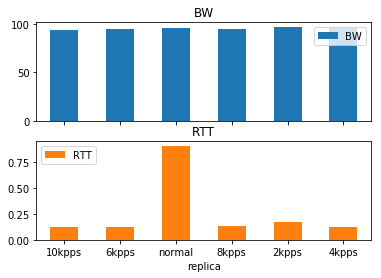

In [49]:
axes = summaryDF['summary'].plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  # doctest: +SKIP

## BUGS 

1. Cuadrar las rutas asociadas a los archivos cvs resumen.
2. Los resultados no cuadran.
3. Mirar se el argumento asociado al hping3 si esta funcionando bien y esta presentando resultados de variabilidad en cuanto al numero de paquetes enviados. Para el caso, los resultados que se han visto no parecen como buenos por eso no se ve una buena variabilidad en cuanto al ancho de banda como en el caso en el cual se dieran las cosas si se mandaran los comandos por terminal.